
# Project: Investigate a Dataset for No_show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction


This is data set collects information from 100,000 medical appointments in brazil We focus on the question: Will the patient attend an appointment?

We will try to find out what are the factors affecting the patient's non-attendance


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# Data wrangling

In this section we will going to take afew steps in order to clean and prepare the data for analysis

## Step one: Reading and explore the data 

In [8]:
df=pd.read_csv("appointment.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Step two: Display genral statistics 

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Step three: Remove NA and duplicates 

In [12]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [13]:
df.duplicated().any()

False


No missing or duplicate data

## Step four: Remove Non important columns 

In [14]:
df.drop(columns=["PatientId","AppointmentID"],inplace=True)

In [15]:
df.rename(columns={"No-show":"No_show"},inplace=True)

In [16]:
df["ScheduledDay"]=pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

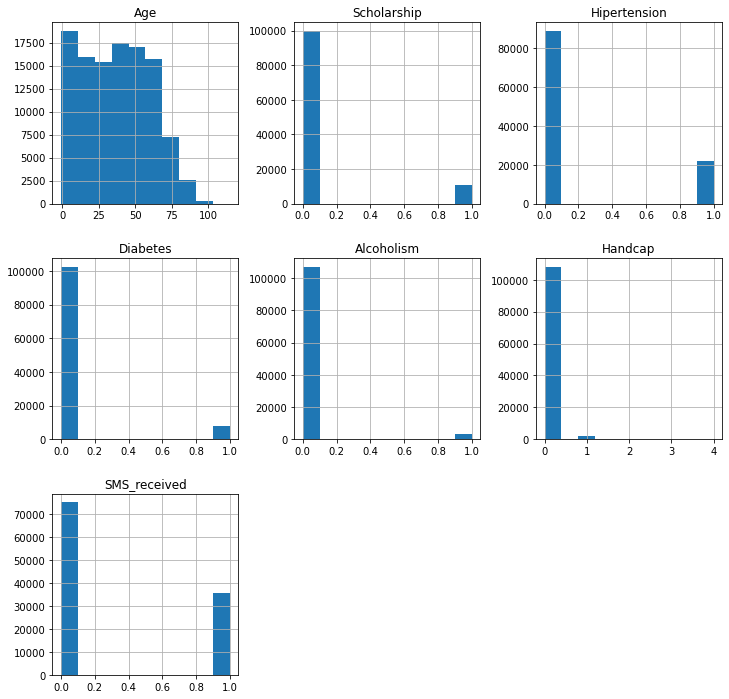

In [18]:
 df.hist(figsize=(12,12))

most of patient did not suffer from Diabetes and Hipertension and Handcap

number of patient has recieved sms is half the number of patient who did not recieve

In [19]:
df[df["No_show"]=="Yes"].count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

In [32]:
df[df["No_show"]=="No"].count()

Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

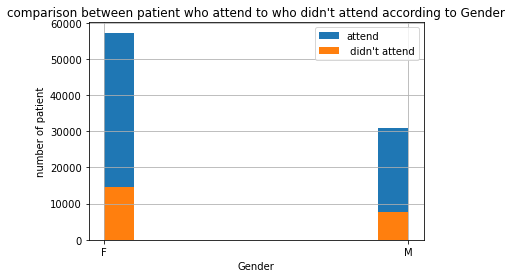

In [35]:
attend=df["No_show"]=="No"
no_attend=df["No_show"]=="Yes"
def draw(variable):
  
    df[variable][attend].hist(label="attend")
    df[variable][no_attend].hist(label=" didn't attend")
    plt.legend()
    plt.title("comparison between patient who attend to who didn't attend according to {}".format(variable))
    plt.xlabel(variable)
    plt.ylabel("number of patient")
draw("Gender")

gender is insignificant because females who showed more than males who did,and females who didn't more than males too

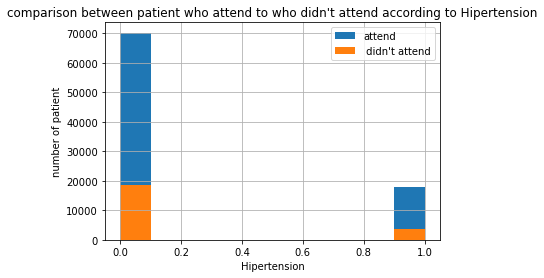

In [36]:
draw("Hipertension")

Hipertension is insignificant

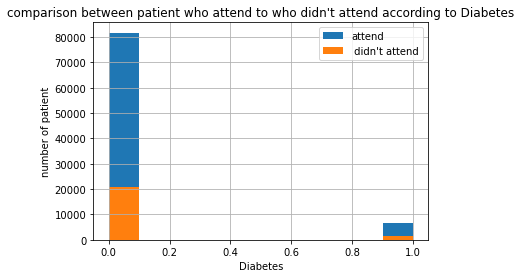

In [37]:
draw("Diabetes")

Diabetes is insignificant

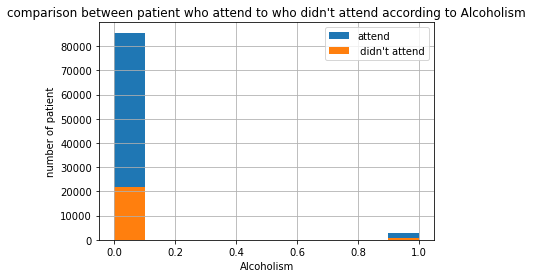

In [38]:
draw("Alcoholism")

Alcoholism is insignificant

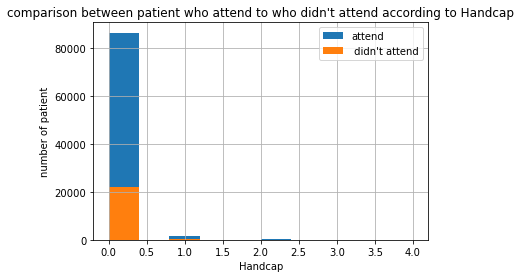

In [39]:
draw("Handcap")

Handcap is insignificant

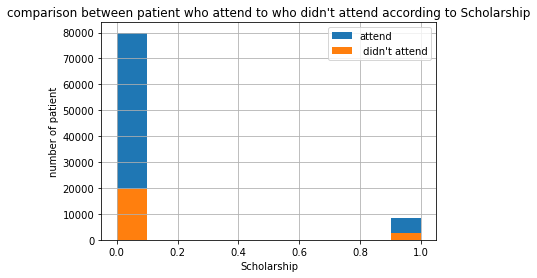

In [40]:
draw("Scholarship")

brasiallian welfare program is insignificant

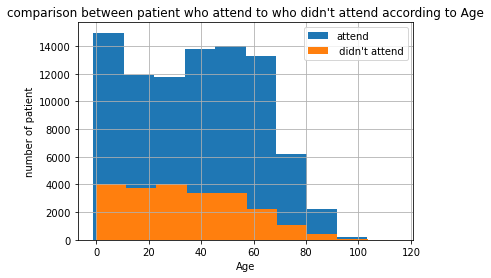

In [41]:
draw("Age")

patient's age between 1 to 20 is the most patient

Older patients attend less

Text(0, 0.5, 'number of patient')

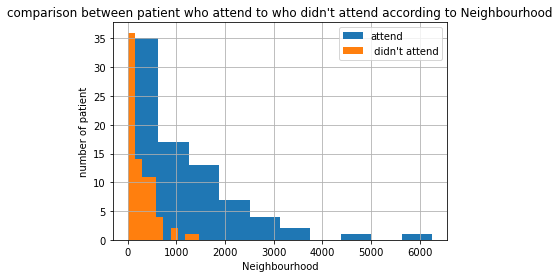

In [29]:
df["Neighbourhood"][attend].value_counts().hist(label="attend")
df["Neighbourhood"][no_attend].value_counts().hist(label=" didn't attend")
plt.legend()
plt.title("comparison between patient who attend to who didn't attend according to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("number of patient")

Text(0, 0.5, 'number of patient')

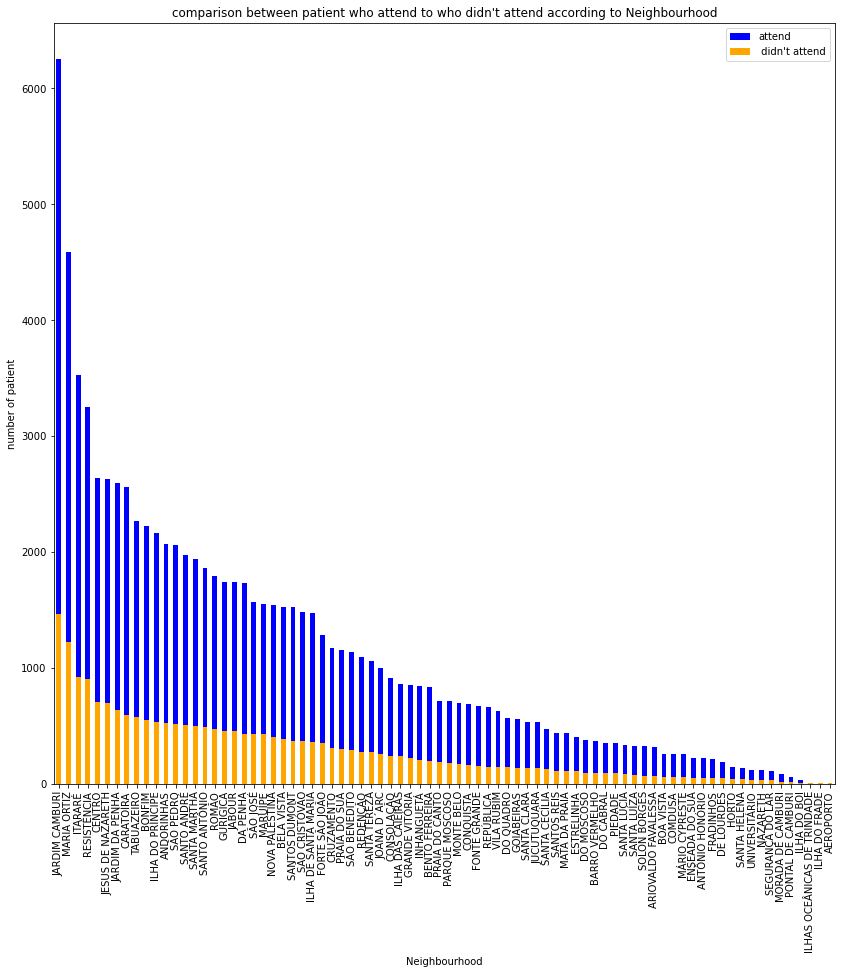

In [30]:
plt.figure(figsize=(14, 14))
df["Neighbourhood"][attend].value_counts().plot(kind="bar",label="attend",color="blue")
df["Neighbourhood"][no_attend].value_counts().plot(kind="bar",label=" didn't attend",color="orange")
plt.legend()
plt.title("comparison between patient who attend to who didn't attend according to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("number of patient")

Neighbourhood is significant

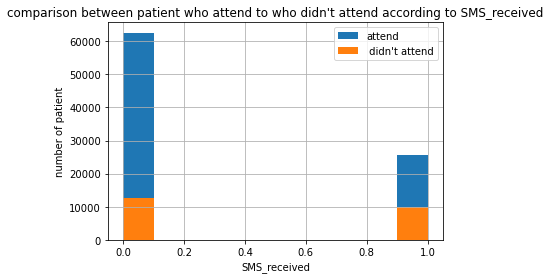

In [43]:
draw("SMS_received")

A strange phenomenon is that a large number of patients who received sms did not attend, and large number of patients who did not receive sms attend

## Conclusion 

i think Neighbourhood is related to patient who attend and age is also related because the youngest patient is the most who attend

## limitations 

Could not detect direct corrolation between paients who attended and those didn't attend and many attributes such as gender, disease, disabilities